#El Problema de Monty Hall

En este cuaderno se simulan el problema de Monty Hall. Para saber más sobre la teoría, consúltese el libro [A first course in Probability](https://www.pearson.com/en-us/subject-catalog/p/first-course-in-probability-a/P200000006334/9780137504589) de Sheldon Ross.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Definimos una clase para la estrategia de no cambiar de puerta con Monty Hall.

**Pseudo-Código para simular la estrategia de no cambiar de puerta en Monty Hall**

Queremos una lista con los valores de $\texttt{1}$ y $\texttt{0}$, donde el primero corresponde a que ganamos el juego y el segundo a que no.

1. Definimos una lista con resultados $\texttt{puntajes}$.
2. Seleccoinamos un número aleatorio entero entre 0 y 2, lo almacenamos en la variable $\texttt{real}$.
3. Seleccoinamos otro número aleatorio entero entre 0 y 2, lo almacenamos en la variable $\texttt{priori}$.
4. Si $\texttt{real = priori}$, entonces agregamos $\texttt{1}$ a $\texttt{puntajes}$. De lo contrario, agregamos $\texttt{0}$.

In [ ]:
class MontyHall_SinCambio():

  def __init__(self):
    '''
    intentos: el número de veces que jugaremos
    puntaje_promedio: lista para guardar las medias de los lanzamientos
    contador: lista para guardar los intentos
    proba: probabilidad de ganar
    jugada: tipo de jugada
    '''
    intentos = 0
    while intentos < 1:
      intentos = int(input('¿Cuántas veces quieres intentar? '))
    self.intentos = intentos
    self.puntaje_promedio = []
    self.contador = [] #Se puede quitar
    self.proba = 0
    self.jugada = "Sin Cambio"

  def Intento(self):
    real = random.randint(0,2) # Aquí está el coche
    priori = random.randint(0,2) # Esta es la que yo elijo

    if real == priori: # Si donde elegí está el carro, gané
        return 1
    else: # Si donde elegí no está el carro, perdí
        return 0

  def Simular(self):
    # Guardamos los puntajes
      puntajes = []
      # Repetimos tantas veces como nos indican
      for i in range(1, self.intentos + 1):
          puntajes.append(self.Intento())  # Guardamos el resultado de esa jugada
          self.puntaje_promedio.append(np.mean(puntajes)) # Guardamos la estimación de la probabilidad
          self.contador.append(i)
      # Guardamos la última estimación y graficamos
      self.proba = self.puntaje_promedio[-1]
      print(self)
      self.GraficarResultados()

  def GraficarResultados(self):
    # Gráfica de las probabilidades
    plt.figure(figsize=(11,6))
    plt.plot(self.contador, self.puntaje_promedio, marker='o', linestyle='-', color='darkblue')
    plt.title(f"Monty Hall ({self.jugada}): {self.intentos}", fontsize=25)
    plt.xlabel('Intentos', fontsize=20)
    plt.ylabel('Probabilidad de ganar', fontsize=20)
    plt.grid(True)  # Simula el estilo "whitegrid" de seaborn
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


  def __str__(self):
    return "\n         Informe        \n**************************\nTipo de jugada: %s \nIntentos: %s \nProbabilidad de ganar: %s \n \
    " %(self.jugada, self.intentos, self.proba)

Ahora definimos otra para la estrategia de no cambiar de puerta con Monty Hall.

**Pseudo-Código para simular la estrategia de cambiar de puerta en Monty Hall**

Queremos una lista con los valores de $\texttt{1}$ y $\texttt{0}$, donde el primero corresponde a que ganamos el juego y el segundo a que no.

1. Definimos una lista con resultados $\texttt{puntajes}$.
2. Seleccoinamos un número aleatorio entero entre 0 y 2, lo almacenamos en la variable $\texttt{real}$.
3. Seleccoinamos otro número aleatorio entero entre 0 y 2, lo almacenamos en la variable $\texttt{priori}$.
4. Definimos una nueva lista llamada $\texttt{opciones_posteriori}$, que sea la lista $\texttt{[0,1,2]}$ sin $\texttt{real}$
5. De la lista $\texttt{opciones_posteriori}$, quitamos aquella entrada que no sea igual que  $\texttt{real}$.
6. Hacemos que  $\texttt{posteriori}$ sea el único valor que queda de la lista  $\texttt{opciones_posteriori}$.
7. Si $\texttt{real = posteriori}$, entonces agregamos $\texttt{1}$ a $\texttt{puntajes}$. De lo contrario, agregamos $\texttt{0}$.

In [ ]:
class MontyHall_ConCambio(MontyHall_SinCambio):

    def __init__(self):
        intentos = 0
        while intentos < 1:
            intentos = int(input('¿Cuántas veces quieres intentar? ' ))
        self.intentos = intentos
        self.puntaje_promedio = []
        self.contador = []
        self.proba = 0
        self.jugada = "Con Cambio" # Con cambio

    def Intento(self):
        real = random.randint(0,2) # Aquí está el carro
        priori = random.randint(0,2) # Este es la elección inicial

        opciones_posteriori = [0,1,2] #list(range(3))
        opciones_posteriori.remove(priori) # Quitamos la elegida (porque esa no elige el presentador)

        # Quitamos la puerta donde no haya carro
        if opciones_posteriori[0] == real:
            del opciones_posteriori[1]
        elif opciones_posteriori[1] == real:
            del opciones_posteriori[0]
        else:
            del opciones_posteriori[random.randint(0,1)]

        posteriori = opciones_posteriori[0] # Aquí hacemos el cambio de puerta

        # Puntajes
        if posteriori == real:
            return 1
        else:
            return 0

Ahora ponemos un índice para el juego

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 1
¿Cuántas veces quieres intentar? 50

         Informe        
**************************
Tipo de jugada: Sin Cambio 
Intentos: 50 
Probabilidad de ganar: 0.26 
     


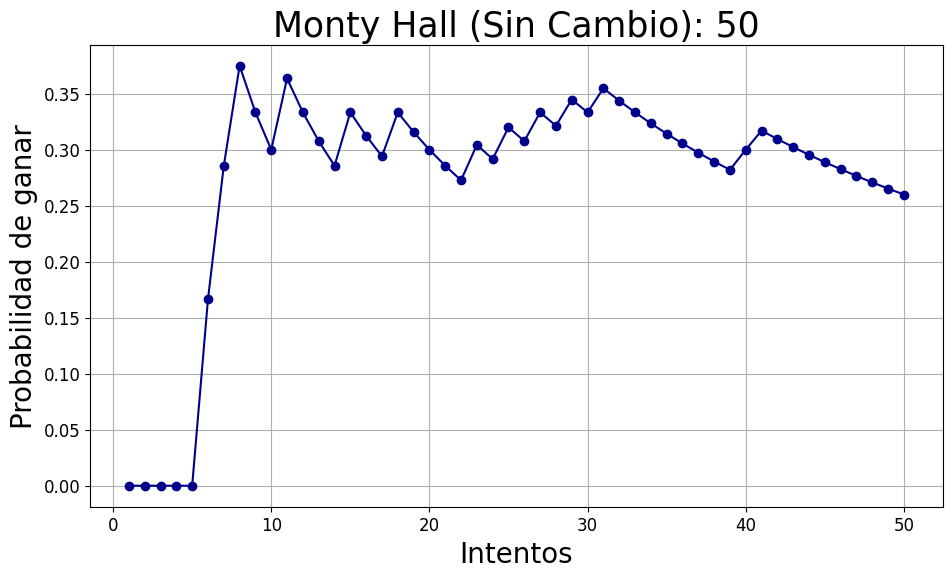

In [ ]:
def Menu():
    # Menu desplegado
    print("     Monty Hall     ")
    print("**************************")
    print("(1) Jugar sin cambio")
    print("(2) Jugar con cambio")
    print("(3) Terminar")
    print("**************************")

    # Preguntamos cómo quieren jugar
    eleccion = int(input("¿Cómo quieres jugar? "))

    # Jugar como quiere el usuario
    if eleccion == 1:
        juego = MontyHall_SinCambio()
    elif eleccion == 2:
        juego = MontyHall_ConCambio()
    else:
        print('¡Gracias por jugar!')
        return None

    # Simular el juego
    juego.Simular()

    return None

Menu()

A continuación se presentan algunos ejemplos para ambas estrategias

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 1
¿Cuántas veces quieres intentar? 100

         Informe        
**************************
Tipo de jugada: Sin Cambio 
Intentos: 100 
Probabilidad de ganar: 0.48 
     


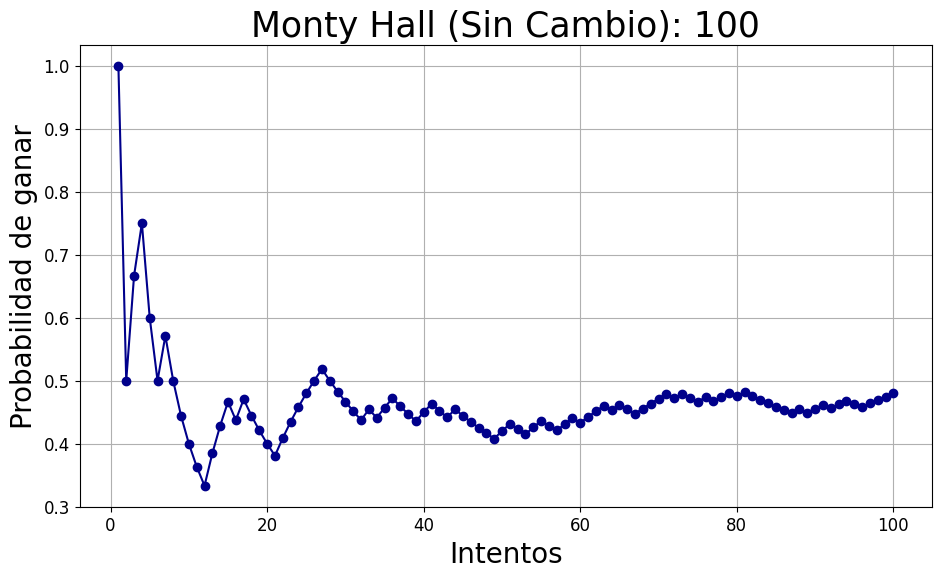

In [ ]:
Menu()

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 1
¿Cuántas veces quieres intentar? 1000

         Informe        
**************************
Tipo de jugada: Sin Cambio 
Intentos: 1000 
Probabilidad de ganar: 0.337 
     


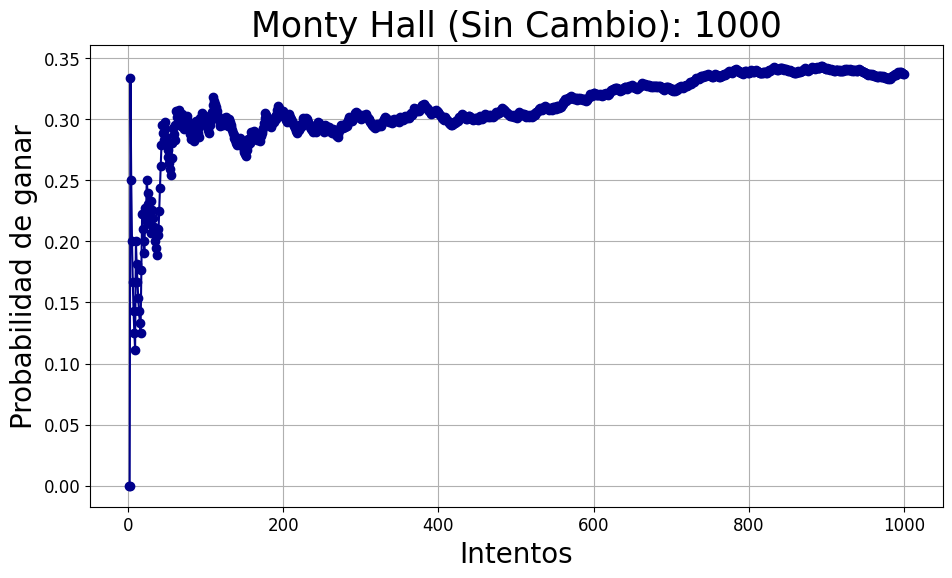

In [ ]:
Menu()

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 2
¿Cuántas veces quieres intentar? 50

         Informe        
**************************
Tipo de jugada: Con Cambio 
Intentos: 50 
Probabilidad de ganar: 0.64 
     


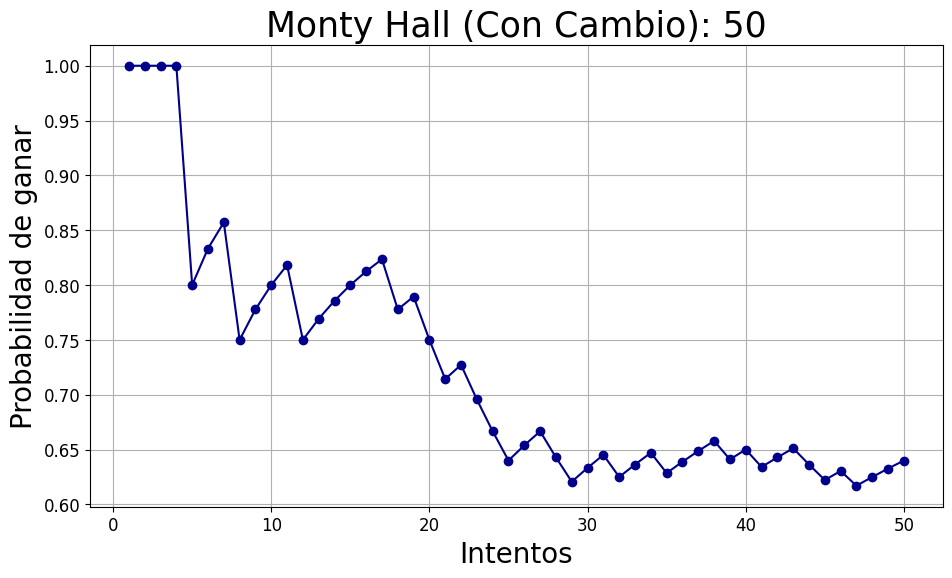

In [ ]:
Menu()

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 2
¿Cuántas veces quieres intentar? 100

         Informe        
**************************
Tipo de jugada: Con Cambio 
Intentos: 100 
Probabilidad de ganar: 0.64 
     


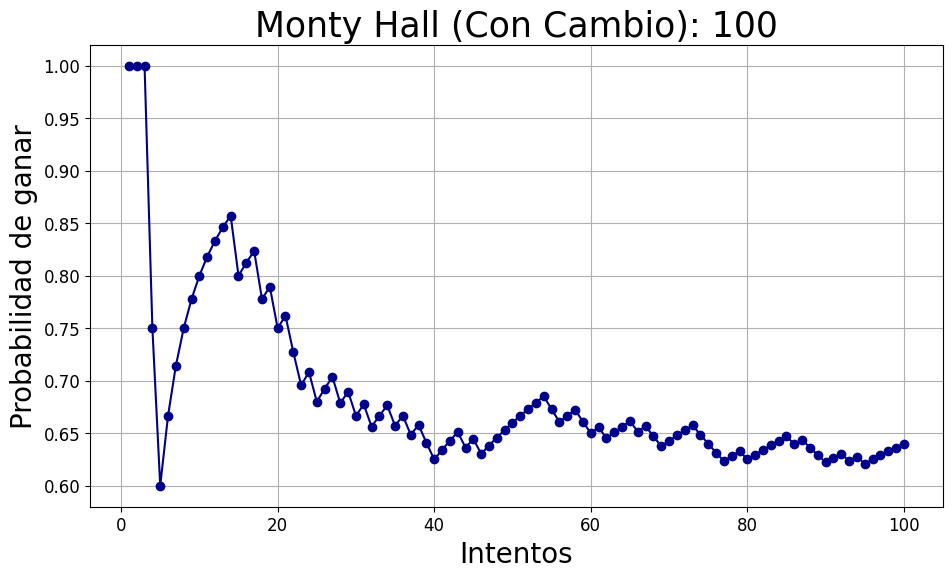

In [ ]:
Menu()

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 2
¿Cuántas veces quieres intentar? 1000

         Informe        
**************************
Tipo de jugada: Con Cambio 
Intentos: 1000 
Probabilidad de ganar: 0.655 
     


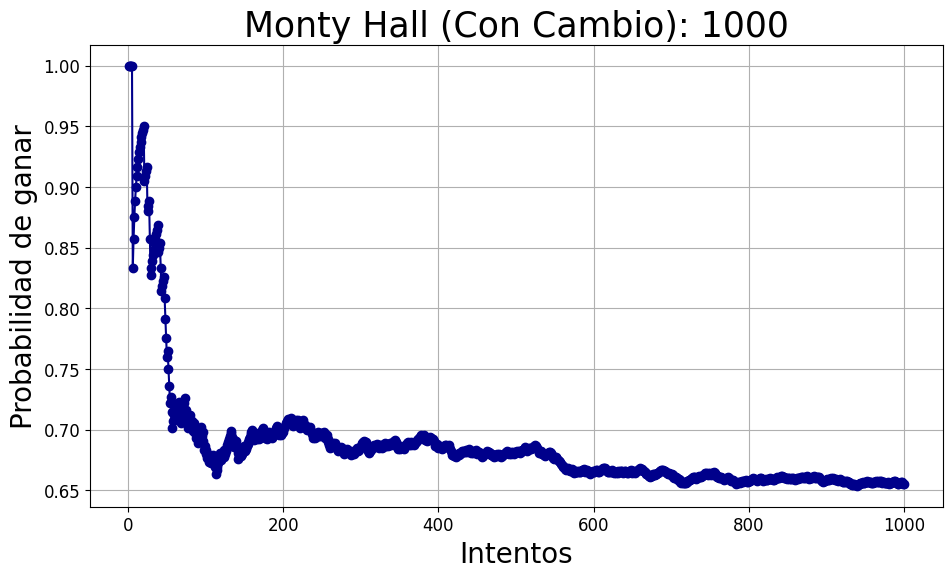

In [ ]:
Menu()

In [ ]:
Menu()

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************
¿Cómo quieres jugar? 3
¡Gracias por jugar!


Como es de esperarse, al tener muchas iteraciones convergemos a las probabilidades de ganar dependiendo de cada estrategia de Monty Hall.